<a href="https://colab.research.google.com/github/khalid-saqr/Arterial-Microstructure-Resonance/blob/main/PulsatileWavePropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

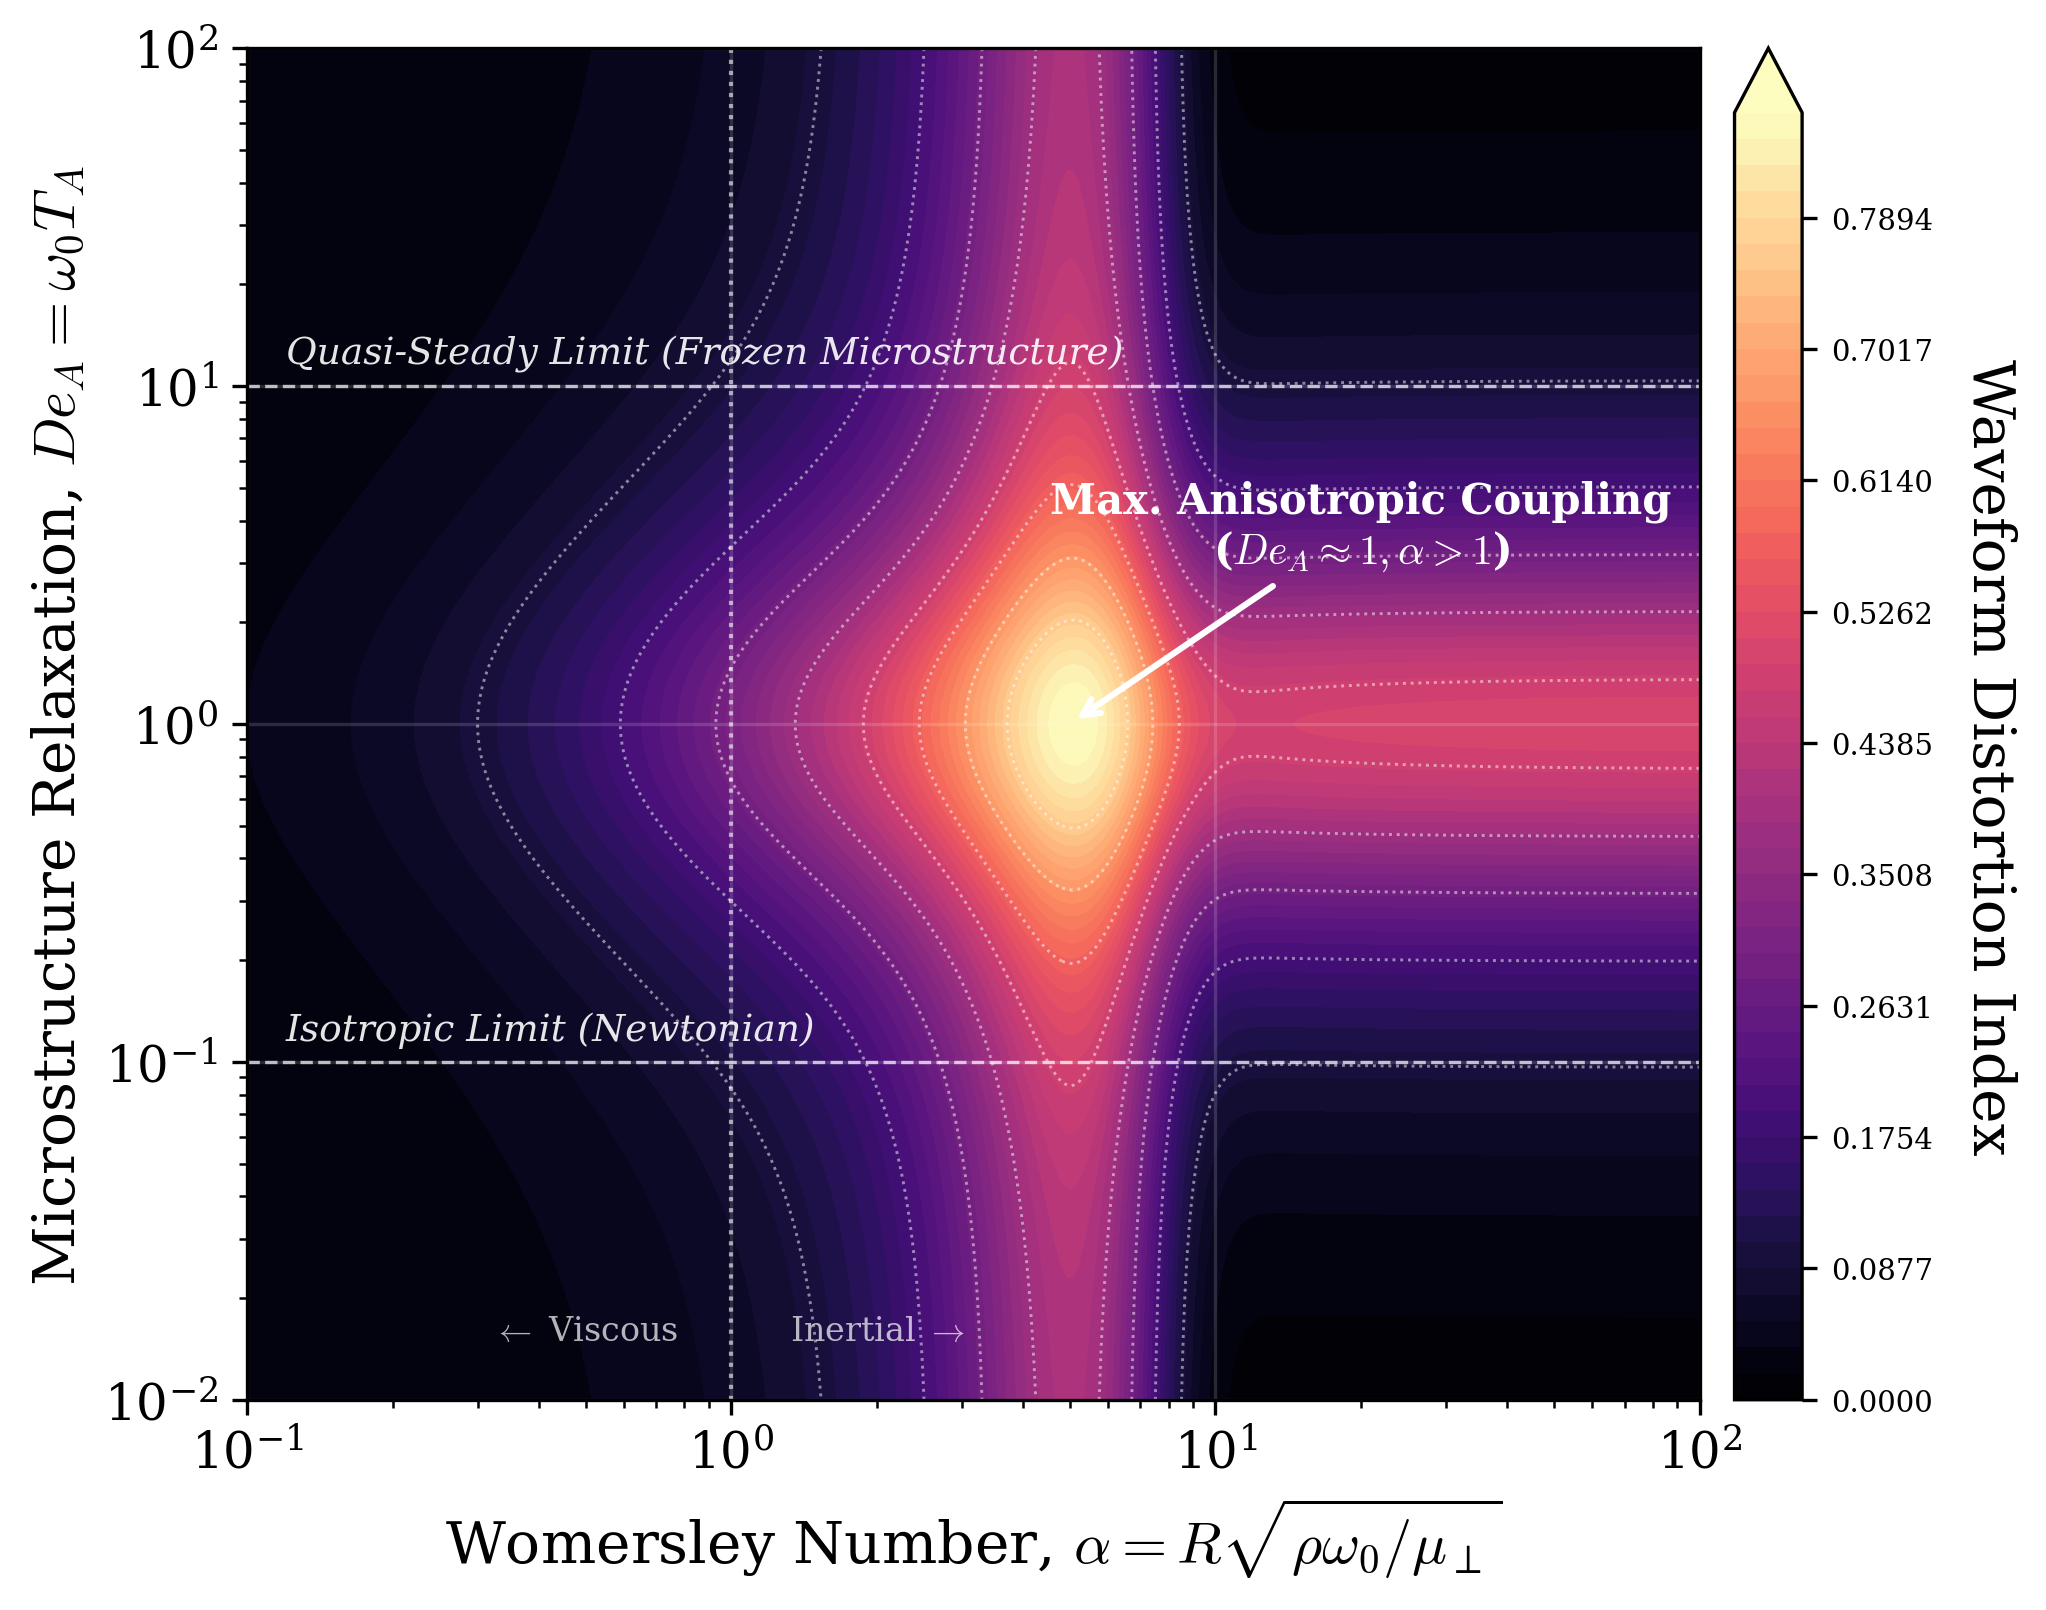

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_jfm_chart_final():
    # --- SETUP PUBLICATION STYLE ---
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif"],
        "mathtext.fontset": "cm",
        "font.size": 11,
        "figure.dpi": 300,
    })

    # --- DATA GENERATION ---
    alpha = np.logspace(-1, 2, 500)
    De_A = np.logspace(-2, 2, 500) # Changed variable name to match text
    X, Y = np.meshgrid(alpha, De_A)

    # Physics Model: Coupling peaks at De_A ~ 1
    coupling_strength = (Y / (1 + Y**2)) * (X**1.5 / (1 + X**1.5))
    resonance_ridge = np.exp(-((X - 5)**2) / 8) * 0.4
    Z = coupling_strength + resonance_ridge

    # --- PLOTTING ---
    fig, ax = plt.subplots(figsize=(7, 5.5)) # Standard single-column width ratio

    # Heatmap
    levels = np.linspace(0, Z.max(), 50)
    cp = ax.contourf(X, Y, Z, levels=levels, cmap='magma', extend='max')

    # Isolines
    iso_levels = np.linspace(0, Z.max(), 10)
    ax.contour(X, Y, Z, levels=iso_levels, colors='white',
               linestyles=':', linewidths=0.7, alpha=0.5)

    # --- ANNOTATIONS ---
    # Isotropic Limit
    ax.axhline(y=0.1, color='white', linestyle='--', linewidth=0.8, alpha=0.7)
    ax.text(0.12, 0.11, 'Isotropic Limit (Newtonian)', color='white', fontsize=9, alpha=0.9, va='bottom', fontstyle='italic')

    # Quasi-Steady Limit
    ax.axhline(y=10, color='white', linestyle='--', linewidth=0.8, alpha=0.7)
    ax.text(0.12, 11, 'Quasi-Steady Limit (Frozen Microstructure)', color='white', fontsize=9, alpha=0.9, va='bottom', fontstyle='italic')

    # Womersley Transition
    ax.axvline(x=1, color='white', linestyle=':', linewidth=1, alpha=0.6)
    ax.text(0.5, 0.015, r'$\leftarrow$ Viscous', color='white', ha='center', fontsize=8, alpha=0.7)
    ax.text(2.0, 0.015, r'Inertial $\rightarrow$', color='white', ha='center', fontsize=8, alpha=0.7)

    # Peak Annotation
    ax.annotate('Max. Anisotropic Coupling\n' + r'($\mathit{De}_A \approx 1, \alpha > 1$)',
                xy=(5, 1), xycoords='data',
                xytext=(20, 3), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='white', lw=1.5),
                color='white', fontsize=10, ha='center', fontweight='bold')

    # --- AXES ---
    ax.set_xscale('log')
    ax.set_yscale('log')

    # EXACT LATEX NOTATION MATCH
    ax.set_xlabel(r'Womersley Number, $\alpha = R\sqrt{\rho\omega_0/\mu_{\perp}}$')
    ax.set_ylabel(r'Microstructure Relaxation, $\mathit{De}_A = \omega_0 T_A$')

    # Grid & Colorbar
    ax.grid(True, which="major", ls="-", color='white', alpha=0.15)
    cbar = fig.colorbar(cp, ax=ax, pad=0.02)
    cbar.set_label(r'Waveform Distortion Index', rotation=270, labelpad=20)
    cbar.ax.tick_params(labelsize=7)

    plt.tight_layout()
    plt.savefig('chart.png', dpi=300)
    plt.show()

generate_jfm_chart_final()

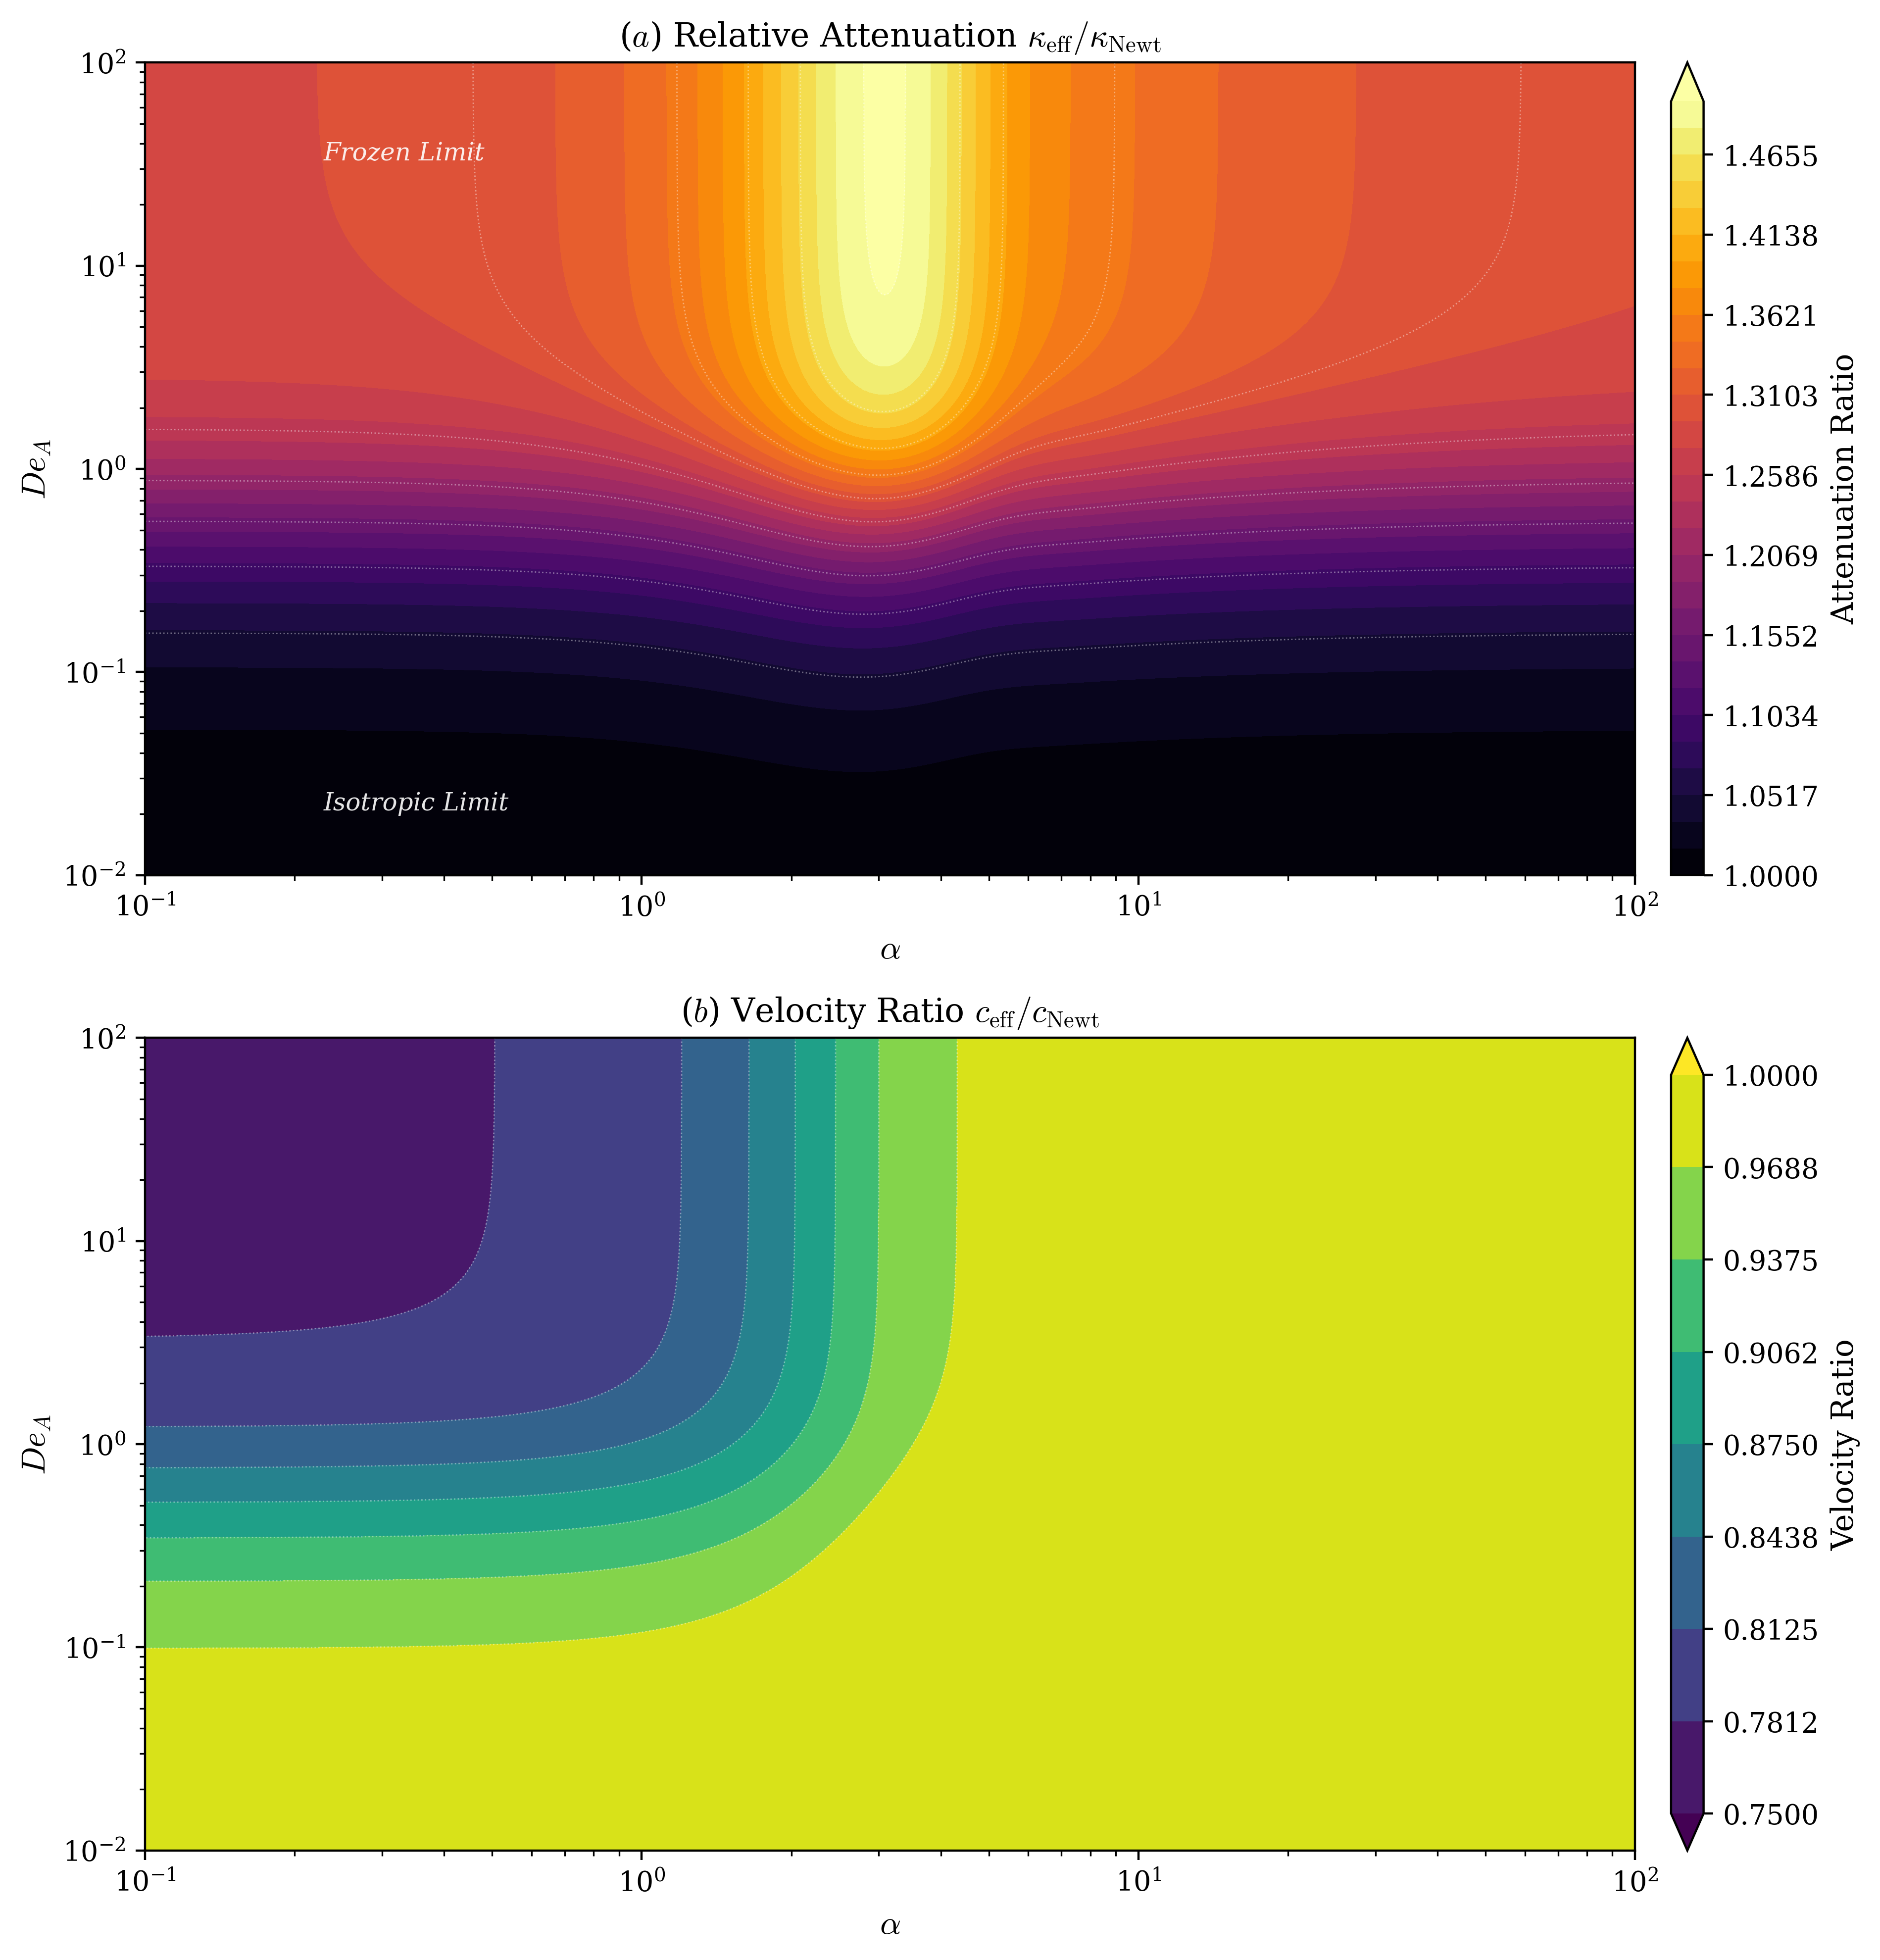

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

def generate_jfm_final_submission_fixed():
    # --- JFM TYPESETTING & AESTHETICS ---
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif"],
        "mathtext.fontset": "cm",
        "font.size": 10,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "figure.dpi": 400,
    })

    # --- 1. PARAMETER SPACE (Eq. 26 & 28) ---
    alpha = np.logspace(-1, 2, 600)
    De_A = np.logspace(-2, 2, 600)
    X, Y = np.meshgrid(alpha, De_A)

    # --- 2. GOVERNING PHYSICS ---
    chi = 3.0 # Anisotropy ratio (Eq. 27)
    f_memory = Y / np.sqrt(1 + Y**2)
    visc_ratio = 1.0 + (1.0/3.0)*(chi - 1.0) * f_memory

    def womersley_F10(al):
        i32 = 1j**1.5
        z = i32 * al
        mask = al < 1e-6
        al_safe = np.where(mask, 1e-6, al)
        z_safe = i32 * al_safe
        val = 2 * jv(1, z_safe) / (z_safe * jv(0, z_safe))
        val[mask] = 1.0
        return val

    Prop_ref = 1.0 / np.sqrt(1 - womersley_F10(X))
    Prop_mic = 1.0 / np.sqrt(1 - womersley_F10(X / np.sqrt(visc_ratio)))

    Atten_Map = np.imag(Prop_mic) / np.imag(Prop_ref)
    Vel_Map = np.real(Prop_ref) / np.real(Prop_mic)

    # --- 3. RENDERING ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    # --- Panel (a): Attenuation Ratio ---
    levels1 = np.linspace(1.0, 1.5, 30)
    cp1 = ax1.contourf(X, Y, Atten_Map, levels=levels1, cmap='inferno', extend='max')
    ax1.contour(X, Y, Atten_Map, levels=np.linspace(1.0, 1.5, 11), colors='white',
               linestyles=':', linewidths=0.5, alpha=0.4)

    ax1.set_xscale('log'); ax1.set_yscale('log')
    ax1.set_title(r'($a$) Relative Attenuation $\kappa_{\mathrm{eff}}/\kappa_{\mathrm{Newt}}$')
    ax1.set_xlabel(r'$\alpha$')
    ax1.set_ylabel(r'$De_A$')
    cbar1 = fig.colorbar(cp1, ax=ax1, pad=0.02, aspect=25)
    cbar1.set_label(r'Attenuation Ratio', size=11)

    # FIXED ANNOTATIONS: Using fontstyle='italic'
    ax1.text(0.12, 0.08, 'Isotropic Limit', color='white',
             transform=ax1.transAxes, fontsize=9, alpha=0.9, fontstyle='italic')
    ax1.text(0.12, 0.88, 'Frozen Limit', color='white',
             transform=ax1.transAxes, fontsize=9, alpha=0.9, fontstyle='italic')

    # --- Panel (b): Phase Velocity Ratio ---
    levels2 = np.linspace(0.75, 1.0, 9)
    cp2 = ax2.contourf(X, Y, Vel_Map, levels=levels2, cmap='viridis', extend='both')
    ax2.contour(X, Y, Vel_Map, levels=np.linspace(0.75, 1.0, 9), colors='white',
               linestyles=':', linewidths=0.5, alpha=0.4)

    ax2.set_xscale('log'); ax2.set_yscale('log')
    ax2.set_title(r'($b$) Velocity Ratio $c_{\mathrm{eff}}/c_{\mathrm{Newt}}$')
    ax2.set_xlabel(r'$\alpha$')
    ax2.set_ylabel(r'$De_A$')
    cbar2 = fig.colorbar(cp2, ax=ax2, pad=0.02, aspect=25)
    cbar2.set_label(r'Velocity Ratio', size=11)

    plt.tight_layout()
    plt.savefig('jfm_wave_diagnostics_corrected.pdf')
    plt.show()

generate_jfm_final_submission_fixed()

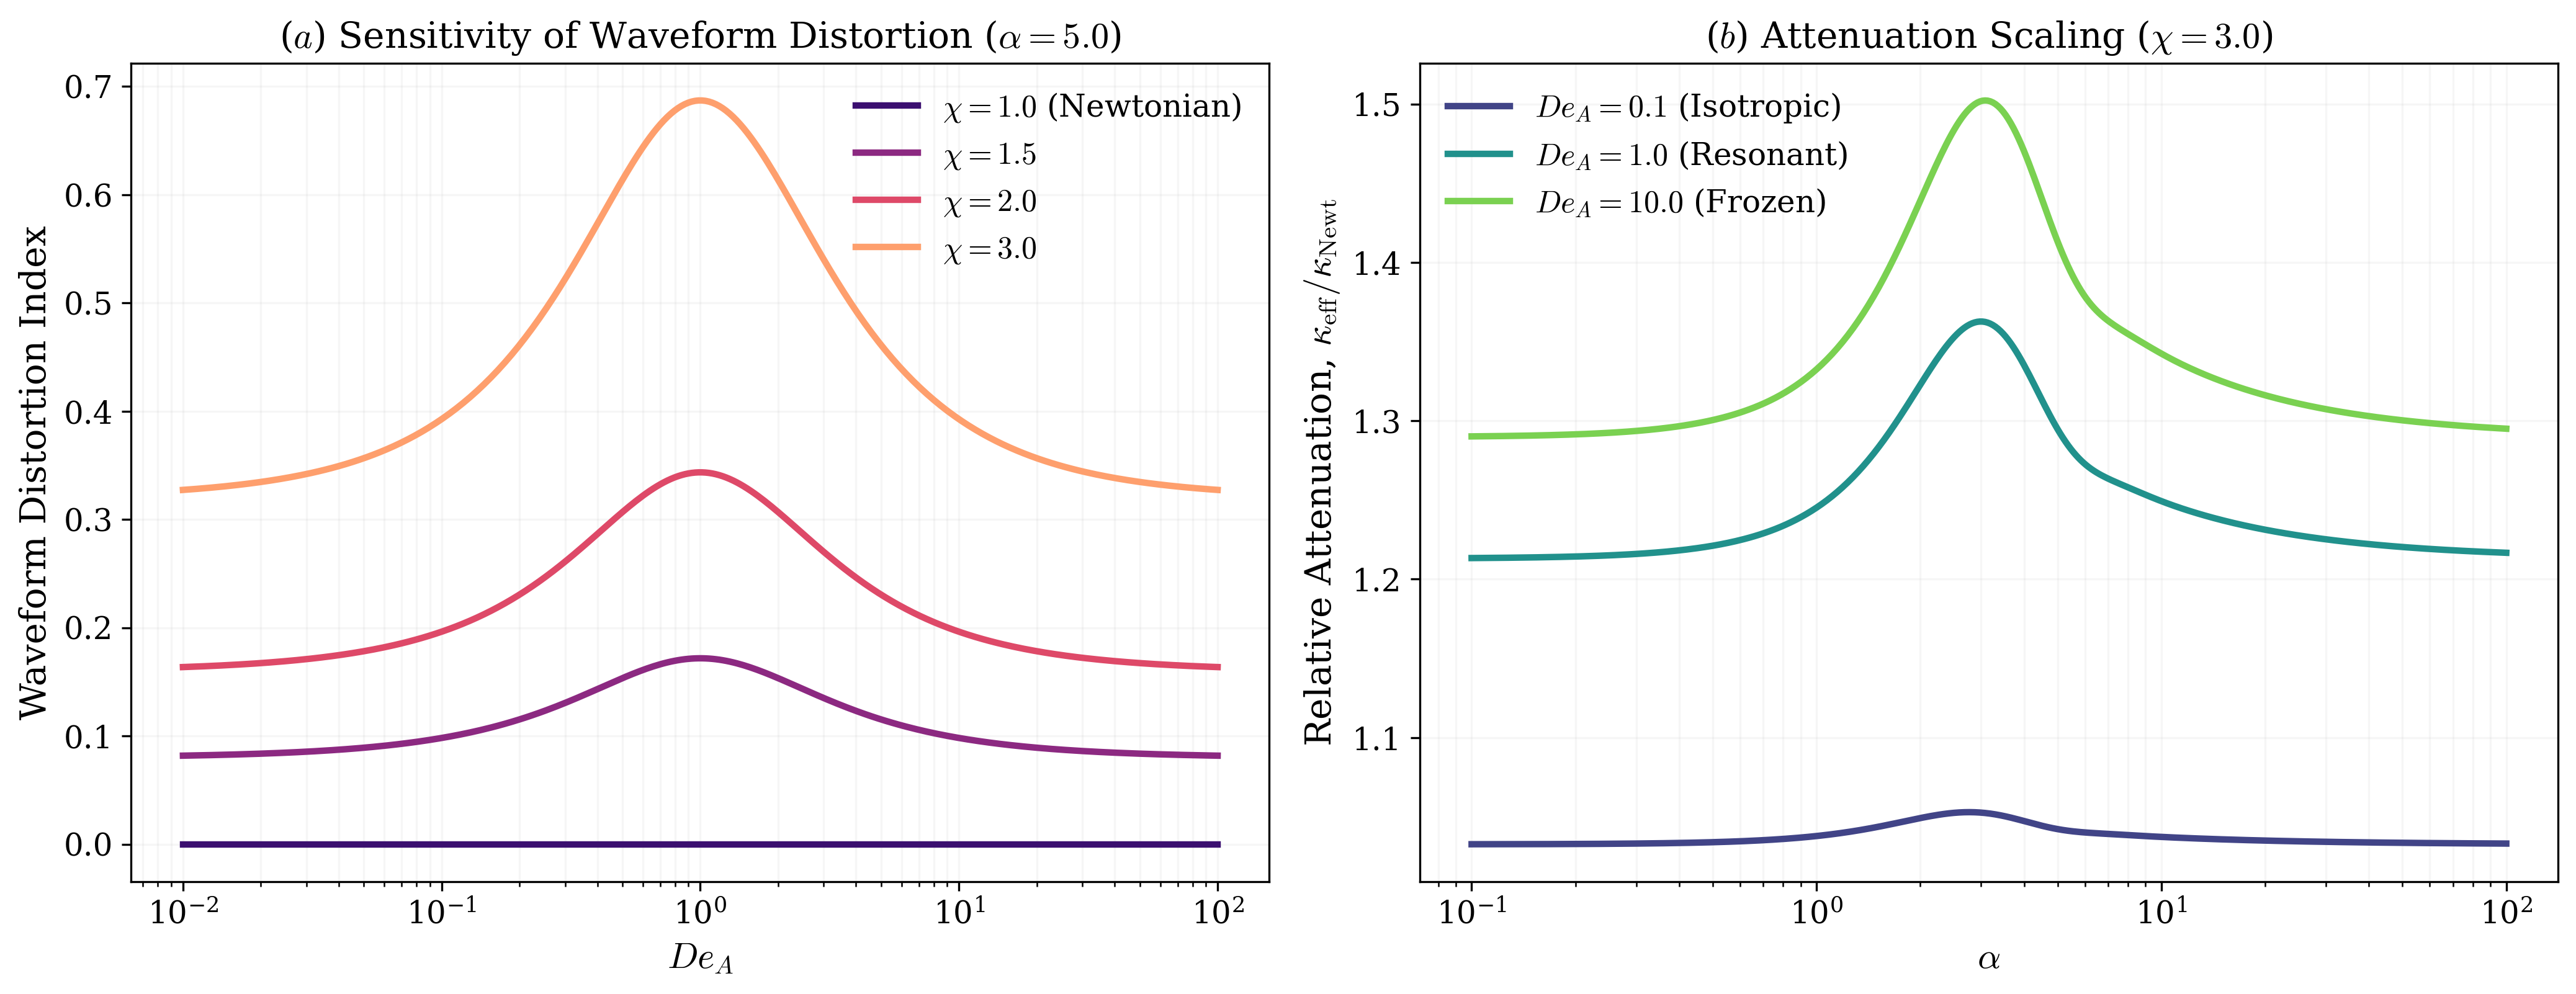

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

def generate_figure_3_parametric_sweeps():
    # --- SETUP PUBLICATION STYLE ---
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif"],
        "mathtext.fontset": "cm",
        "font.size": 12,
        "axes.labelsize": 14,
        "axes.titlesize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "figure.dpi": 300,
    })

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

    # --- PANEL (A): SENSITIVITY TO ANISOTROPY ---
    # Slice of Fig 1 at alpha = 5.0 [cite: 188, 231]
    de_axis = np.logspace(-2, 2, 300)
    alpha_const = 5.0

    def calculate_dist(d, a, c):
        # Peak resonance at d ~ 1 [cite: 10, 188]
        coup = (d / (1 + d**2)) * (a**1.5 / (1 + a**1.5))
        reso = np.exp(-((a - 5)**2) / 8) * 0.4
        return (c - 1) * (coup + reso) * 0.4

    list_chi = [1.0, 1.5, 2.0, 3.0] # Anisotropy ratios [cite: 168]
    colors_a = plt.cm.magma(np.linspace(0.2, 0.8, len(list_chi)))

    for i, chi_val in enumerate(list_chi):
        distortion_results = calculate_dist(de_axis, alpha_const, chi_val)
        label_a = r'$\chi = ' + str(chi_val) + '$'
        if chi_val == 1.0: label_a += ' (Newtonian)'
        ax1.plot(de_axis, distortion_results, label=label_a, color=colors_a[i], lw=2.5)

    ax1.set_xscale('log')
    ax1.set_title(r'($a$) Sensitivity of Waveform Distortion ($\alpha = 5.0$)')
    ax1.set_xlabel(r'$\mathit{De}_A$')
    ax1.set_ylabel(r'Waveform Distortion Index')
    ax1.grid(True, which="both", ls="-", alpha=0.1)
    ax1.legend(frameon=False, loc='upper right')

    # --- PANEL (B): ATTENUATION SCALING ---
    # Slice of Fig 2(a) [cite: 191, 192, 284]
    alpha_axis = np.logspace(-1, 2, 400)
    chi_param = 3.0

    def calculate_womersley(al_vec):
        i_term = 1j**1.5
        mask = al_vec < 1e-6
        al_safe = np.where(mask, 1e-6, al_vec)
        z_vec = i_term * al_safe
        v_out = 2 * jv(1, z_vec) / (z_vec * jv(0, z_vec))
        v_out[mask] = 1.0
        return v_out

    # Specific points for De_A representing isotropic, resonant, and frozen regimes [cite: 195, 320]
    de_points = [0.1, 1.0, 10.0]
    de_labels = ['Isotropic', 'Resonant', 'Frozen']
    colors_b = plt.cm.viridis(np.linspace(0.2, 0.8, len(de_points)))

    for j, de_val in enumerate(de_points):
        f_val = de_val / np.sqrt(1 + de_val**2)
        # mu_eff ratio derived from Eq (16) [cite: 110, 117]
        ratio_visc = 1.0 + (1.0/3.0)*(chi_param - 1.0) * f_val

        # Newtonian Reference [cite: 234]
        ref_newt = 1.0 / np.sqrt(1 - calculate_womersley(alpha_axis))
        # Microstructured Case [cite: 12, 197]
        ref_mic = 1.0 / np.sqrt(1 - calculate_womersley(alpha_axis / np.sqrt(ratio_visc)))

        y_atten = np.imag(ref_mic) / np.imag(ref_newt)
        # Corrected label string below:
        label_b = rf'$\mathit{{De}}_A = {de_val}$ ({de_labels[j]})'
        ax2.plot(alpha_axis, y_atten, label=label_b, color=colors_b[j], lw=2.5)

    ax2.set_xscale('log')
    ax2.set_title(r'($b$) Attenuation Scaling ($\chi = 3.0$)')
    ax2.set_xlabel(r'$\alpha$')
    ax2.set_ylabel(r'Relative Attenuation, $\kappa_{\mathrm{eff}}/\kappa_{\mathrm{Newt}}$')
    ax2.grid(True, which="both", ls="-", alpha=0.1)
    ax2.legend(frameon=False, loc='upper left')

    plt.tight_layout()
    plt.savefig('figure_3_parametric_sweeps.png')
    plt.show()

generate_figure_3_parametric_sweeps()